# ***Classification Algorithm***
Classification algorithms is used to categorize data into predefined classes.

# ***Preprocessing the Liver cirrhosis***

In [4]:
import pandas as pd
df=pd.read_csv("/content/liver_cirrhosis.csv")
df.head()

N_Days Status     Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499   F       N            Y       N     N   
1    1230      C  Placebo  19724   M       Y            N       Y     N   
2    4184      C  Placebo  11839   F       N            N       N     N   
3    2090      D  Placebo  16467   F       N            N       N     N   
4    2105      D  Placebo  21699   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [5]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616      52.786350     98.679006   
min        4.000000    289.000000     26.350000      33.000000     62.000000   
25%       52.000000   1032.000000     92.000000      92.000000    189.000000   
50%       97.648387   1828.000000    122.556346     124.702128    251.000000   
75%      107.000000   1982.655769    134.850000     127.000000    311.000000   
max      588.000000  13862.400000    457.250000     598.000000    721.000000   

        Prothrombin        Stage  
count  25000.000000  25000.00000  
mean      10.734549      2.00116  
std        0.904436      0.81387  
min        9.000000      1.00000  
25%       10.000000      1.00000  
50%       10.600000      2.00000  
75%       11.100000      3.00000  
max       18.000000      3.00000

In [7]:
df.shape

(25000, 19)

In [8]:
df.describe(include='object')

Status     Drug    Sex Ascites Hepatomegaly Spiders  Edema
count   25000    25000  25000   25000        25000   25000  25000
unique      3        2      2       2            2       2      3
top         C  Placebo      F       N            N       N      N
freq    13516    15827  22137   16798        15243   13614  20220

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Display value counts for each categorical column
for col in categorical_columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Status:
Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64

Value counts for Drug:
Drug
Placebo            15827
D-penicillamine     9173
Name: count, dtype: int64

Value counts for Sex:
Sex
F    22137
M     2863
Name: count, dtype: int64

Value counts for Ascites:
Ascites
N    16798
Y     8202
Name: count, dtype: int64

Value counts for Hepatomegaly:
Hepatomegaly
N    15243
Y     9757
Name: count, dtype: int64

Value counts for Spiders:
Spiders
N    13614
Y    11386
Name: count, dtype: int64

Value counts for Edema:
Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64



# ***Data cleaning using replace and map for objects***

In [10]:
#converting age in days to years
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') / 365.25
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age']

0        50.647502
1        54.001369
2        32.413415
3        45.084189
4        59.408624
           ...    
24995    64.646133
24996    64.646133
24997    45.820671
24998    46.516085
24999    46.516085
Name: Age, Length: 25000, dtype: float64

In [11]:
#columns to be converted from object to int
columns_to_convert = ['Ascites', 'Hepatomegaly', 'Spiders']
# Convert 'Y' to 1 and 'N' to 0
df[columns_to_convert] = df[columns_to_convert].replace({'Y': 1, 'N': 0})
print(df)


       N_Days Status             Drug        Age Sex  Ascites  Hepatomegaly  \
0        2221      C          Placebo  50.647502   F        0             1   
1        1230      C          Placebo  54.001369   M        1             0   
2        4184      C          Placebo  32.413415   F        0             0   
3        2090      D          Placebo  45.084189   F        0             0   
4        2105      D          Placebo  59.408624   F        0             1   
...       ...    ...              ...        ...  ..      ...           ...   
24995    3584      D  D-penicillamine  64.646133   F        0             0   
24996    3584      D  D-penicillamine  64.646133   F        0             0   
24997     971      D  D-penicillamine  45.820671   F        0             1   
24998    3707      C  D-penicillamine  46.516085   F        0             1   
24999    3707      C  D-penicillamine  46.516085   F        0             1   

       Spiders Edema  Bilirubin  Cholesterol  Album

In [12]:
# Convert sex male='M' to 1 and female='F' to 0
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 0})
print(df)


       N_Days Status             Drug        Age  Sex  Ascites  Hepatomegaly  \
0        2221      C          Placebo  50.647502    0        0             1   
1        1230      C          Placebo  54.001369    1        1             0   
2        4184      C          Placebo  32.413415    0        0             0   
3        2090      D          Placebo  45.084189    0        0             0   
4        2105      D          Placebo  59.408624    0        0             1   
...       ...    ...              ...        ...  ...      ...           ...   
24995    3584      D  D-penicillamine  64.646133    0        0             0   
24996    3584      D  D-penicillamine  64.646133    0        0             0   
24997     971      D  D-penicillamine  45.820671    0        0             1   
24998    3707      C  D-penicillamine  46.516085    0        0             1   
24999    3707      C  D-penicillamine  46.516085    0        0             1   

       Spiders Edema  Bilirubin  Choles

In [13]:
df['Drug'] = df['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
print(df)

       N_Days Status  Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        2221      C     0  50.647502    0        0             1        0   
1        1230      C     0  54.001369    1        1             0        1   
2        4184      C     0  32.413415    0        0             0        0   
3        2090      D     0  45.084189    0        0             0        0   
4        2105      D     0  59.408624    0        0             1        0   
...       ...    ...   ...        ...  ...      ...           ...      ...   
24995    3584      D     1  64.646133    0        0             0        0   
24996    3584      D     1  64.646133    0        0             0        0   
24997     971      D     1  45.820671    0        0             1        1   
24998    3707      C     1  46.516085    0        0             1        0   
24999    3707      C     1  46.516085    0        0             1        0   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos 

In [14]:
# Convert 'Status' column to numeric
df['Status'] = df['Status'].map({'C': 0, 'D': 1, 'CL': 2})
# Encode 'Edema' column to numeric
df['Edema'] = df['Edema'].map({'S': 0.5, 'Y': 1, 'N': 0})
print(df)

       N_Days  Status  Drug        Age  Sex  Ascites  Hepatomegaly  Spiders  \
0        2221       0     0  50.647502    0        0             1        0   
1        1230       0     0  54.001369    1        1             0        1   
2        4184       0     0  32.413415    0        0             0        0   
3        2090       1     0  45.084189    0        0             0        0   
4        2105       1     0  59.408624    0        0             1        0   
...       ...     ...   ...        ...  ...      ...           ...      ...   
24995    3584       1     1  64.646133    0        0             0        0   
24996    3584       1     1  64.646133    0        0             0        0   
24997     971       1     1  45.820671    0        0             1        1   
24998    3707       0     1  46.516085    0        0             1        0   
24999    3707       0     1  46.516085    0        0             1        0   

       Edema  Bilirubin  Cholesterol  Albumin  Copp

# ***Correlation matrix***

In [15]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

N_Days    Status      Drug       Age       Sex   Ascites  \
N_Days         1.000000 -0.352685  0.090464 -0.060569  0.002075 -0.150437   
Status        -0.352685  1.000000  0.055328  0.001644  0.049126  0.017149   
Drug           0.090464  0.055328  1.000000  0.005641  0.070240 -0.371468   
Age           -0.060569  0.001644  0.005641  1.000000  0.141418  0.196306   
Sex            0.002075  0.049126  0.070240  0.141418  1.000000 -0.028170   
Ascites       -0.150437  0.017149 -0.371468  0.196306 -0.028170  1.000000   
Hepatomegaly  -0.200410  0.273533  0.115855  0.053200  0.059129 -0.300229   
Spiders       -0.190765 -0.013526 -0.335426  0.029368 -0.112474  0.636974   
Edema         -0.321355  0.230146  0.003558  0.100458  0.011369  0.106499   
Bilirubin     -0.394799  0.325525 -0.046757  0.006081  0.001442  0.059315   
Cholesterol   -0.123461  0.127664 -0.009986 -0.035932 -0.010327 -0.009212   
Albumin        0.368851 -0.173545  0.039801 -0.108807  0.030589 -0.186447   
Copper        -0.281349  0.280730 -0.027728  0.006670  0.039261  0.023429   
Alk_Phos       0.147792  0.053742 -0.005376  0.029575  0.026259 -0.021293   
SGOT          -0.220532  0.212895 -0.019675  0.011165 -0.000592  0.058335   
Tryglicerides -0.147606  0.167620 -0.019693  0.030719  0.008854  0.029818   
Platelets      0.115908 -0.057257  0.005776 -0.123611 -0.085006 -0.187761   
Prothrombin   -0.149960  0.197595 -0.025733  0.042134  0.046095  0.116296   
Stage         -0.309484  0.198682 -0.030862  0.165988  0.061687  0.111012   

               Hepatomegaly   Spiders     Edema  Bilirubin  Cholesterol  \
N_Days            -0.200410 -0.190765 -0.321355  -0.394799    -0.123461   
Status             0.273533 -0.013526  0.230146   0.325525     0.127664   
Drug               0.115855 -0.335426  0.003558  -0.046757    -0.009986   
Age                0.053200  0.029368  0.100458   0.006081    -0.035932   
Sex                0.059129 -0.112474  0.011369   0.001442    -0.010327   
Ascites           -0.300229  0.636974  0.106499   0.059315    -0.009212   
Hepatomegaly       1.000000 -0.130854  0.228946   0.262475     0.112169   
Spiders           -0.130854  1.000000  0.116664   0.122363     0.029342   
Edema              0.228946  0.116664  1.000000   0.374997    -0.022112   
Bilirubin          0.262475  0.122363  0.374997   1.000000     0.339106   
Cholesterol        0.112169  0.029342 -0.022112   0.339106     1.000000   
Albumin           -0.128430 -0.198760 -0.283490  -0.283105    -0.066418   
Copper             0.150825  0.102939  0.206763   0.432199     0.129223   
Alk_Phos           0.055129 -0.002060  0.017813   0.112972     0.116131   
SGOT               0.145789  0.094804  0.191645   0.368024     0.322450   
Tryglicerides      0.131930  0.043507  0.114228   0.379776     0.248305   
Platelets         -0.124463 -0.170010 -0.129038  -0.095162     0.008835   
Prothrombin        0.156886  0.195255  0.312881   0.254145     0.006194   
Stage              0.353210  0.168049  0.251095   0.168006     0.025415   

                Albumin    Copper  Alk_Phos      SGOT  Tryglicerides  \
N_Days         0.368851 -0.281349  0.147792 -0.220532      -0.147606   
Status        -0.173545  0.280730  0.053742  0.212895       0.167620   
Drug           0.039801 -0.027728 -0.005376 -0.019675      -0.019693   
Age           -0.108807  0.006670  0.029575  0.011165       0.030719   
Sex            0.030589  0.039261  0.026259 -0.000592       0.008854   
Ascites       -0.186447  0.023429 -0.021293  0.058335       0.029818   
Hepatomegaly  -0.128430  0.150825  0.055129  0.145789       0.131930   
Spiders       -0.198760  0.102939 -0.002060  0.094804       0.043507   
Edema         -0.283490  0.206763  0.017813  0.191645       0.114228   
Bilirubin     -0.283105  0.432199  0.112972  0.368024       0.379776   
Cholesterol   -0.066418  0.129223  0.116131  0.322450       0.248305   
Albumin        1.000000 -0.179171 -0.125686 -0.162569      -0.111661   
Copper        -0.179171  1.000000  0.20

# ***Visualization***

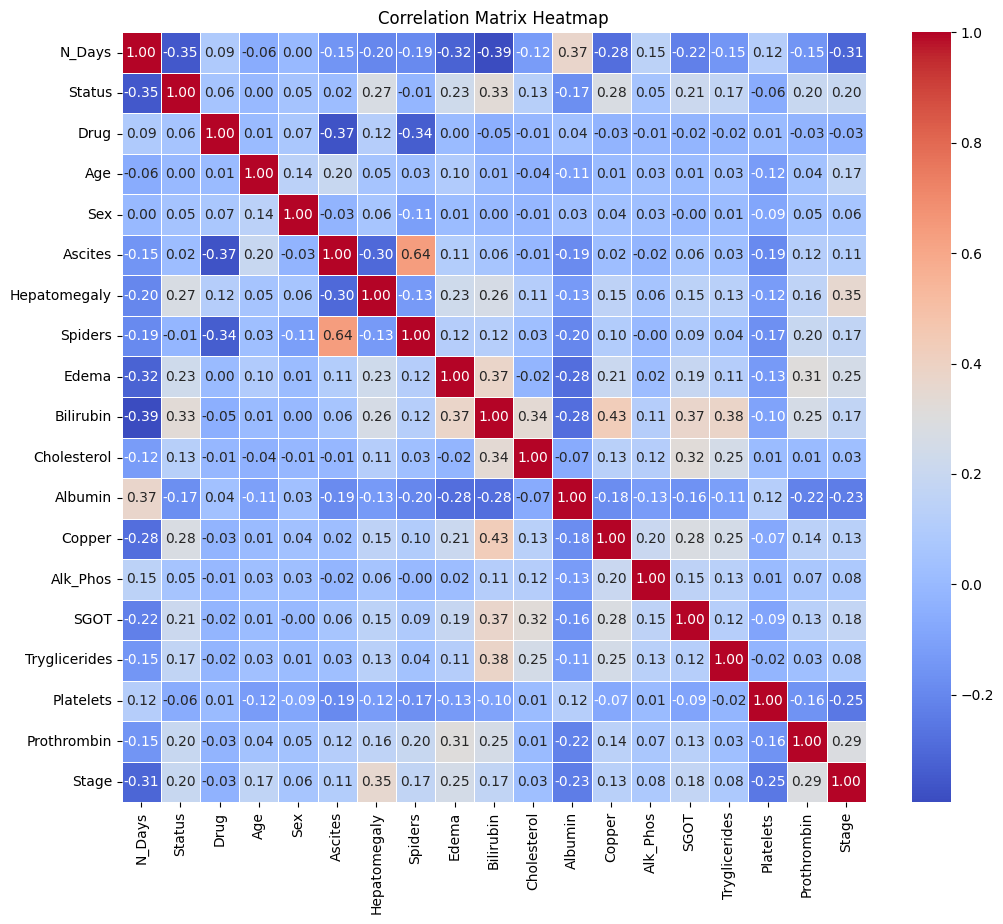

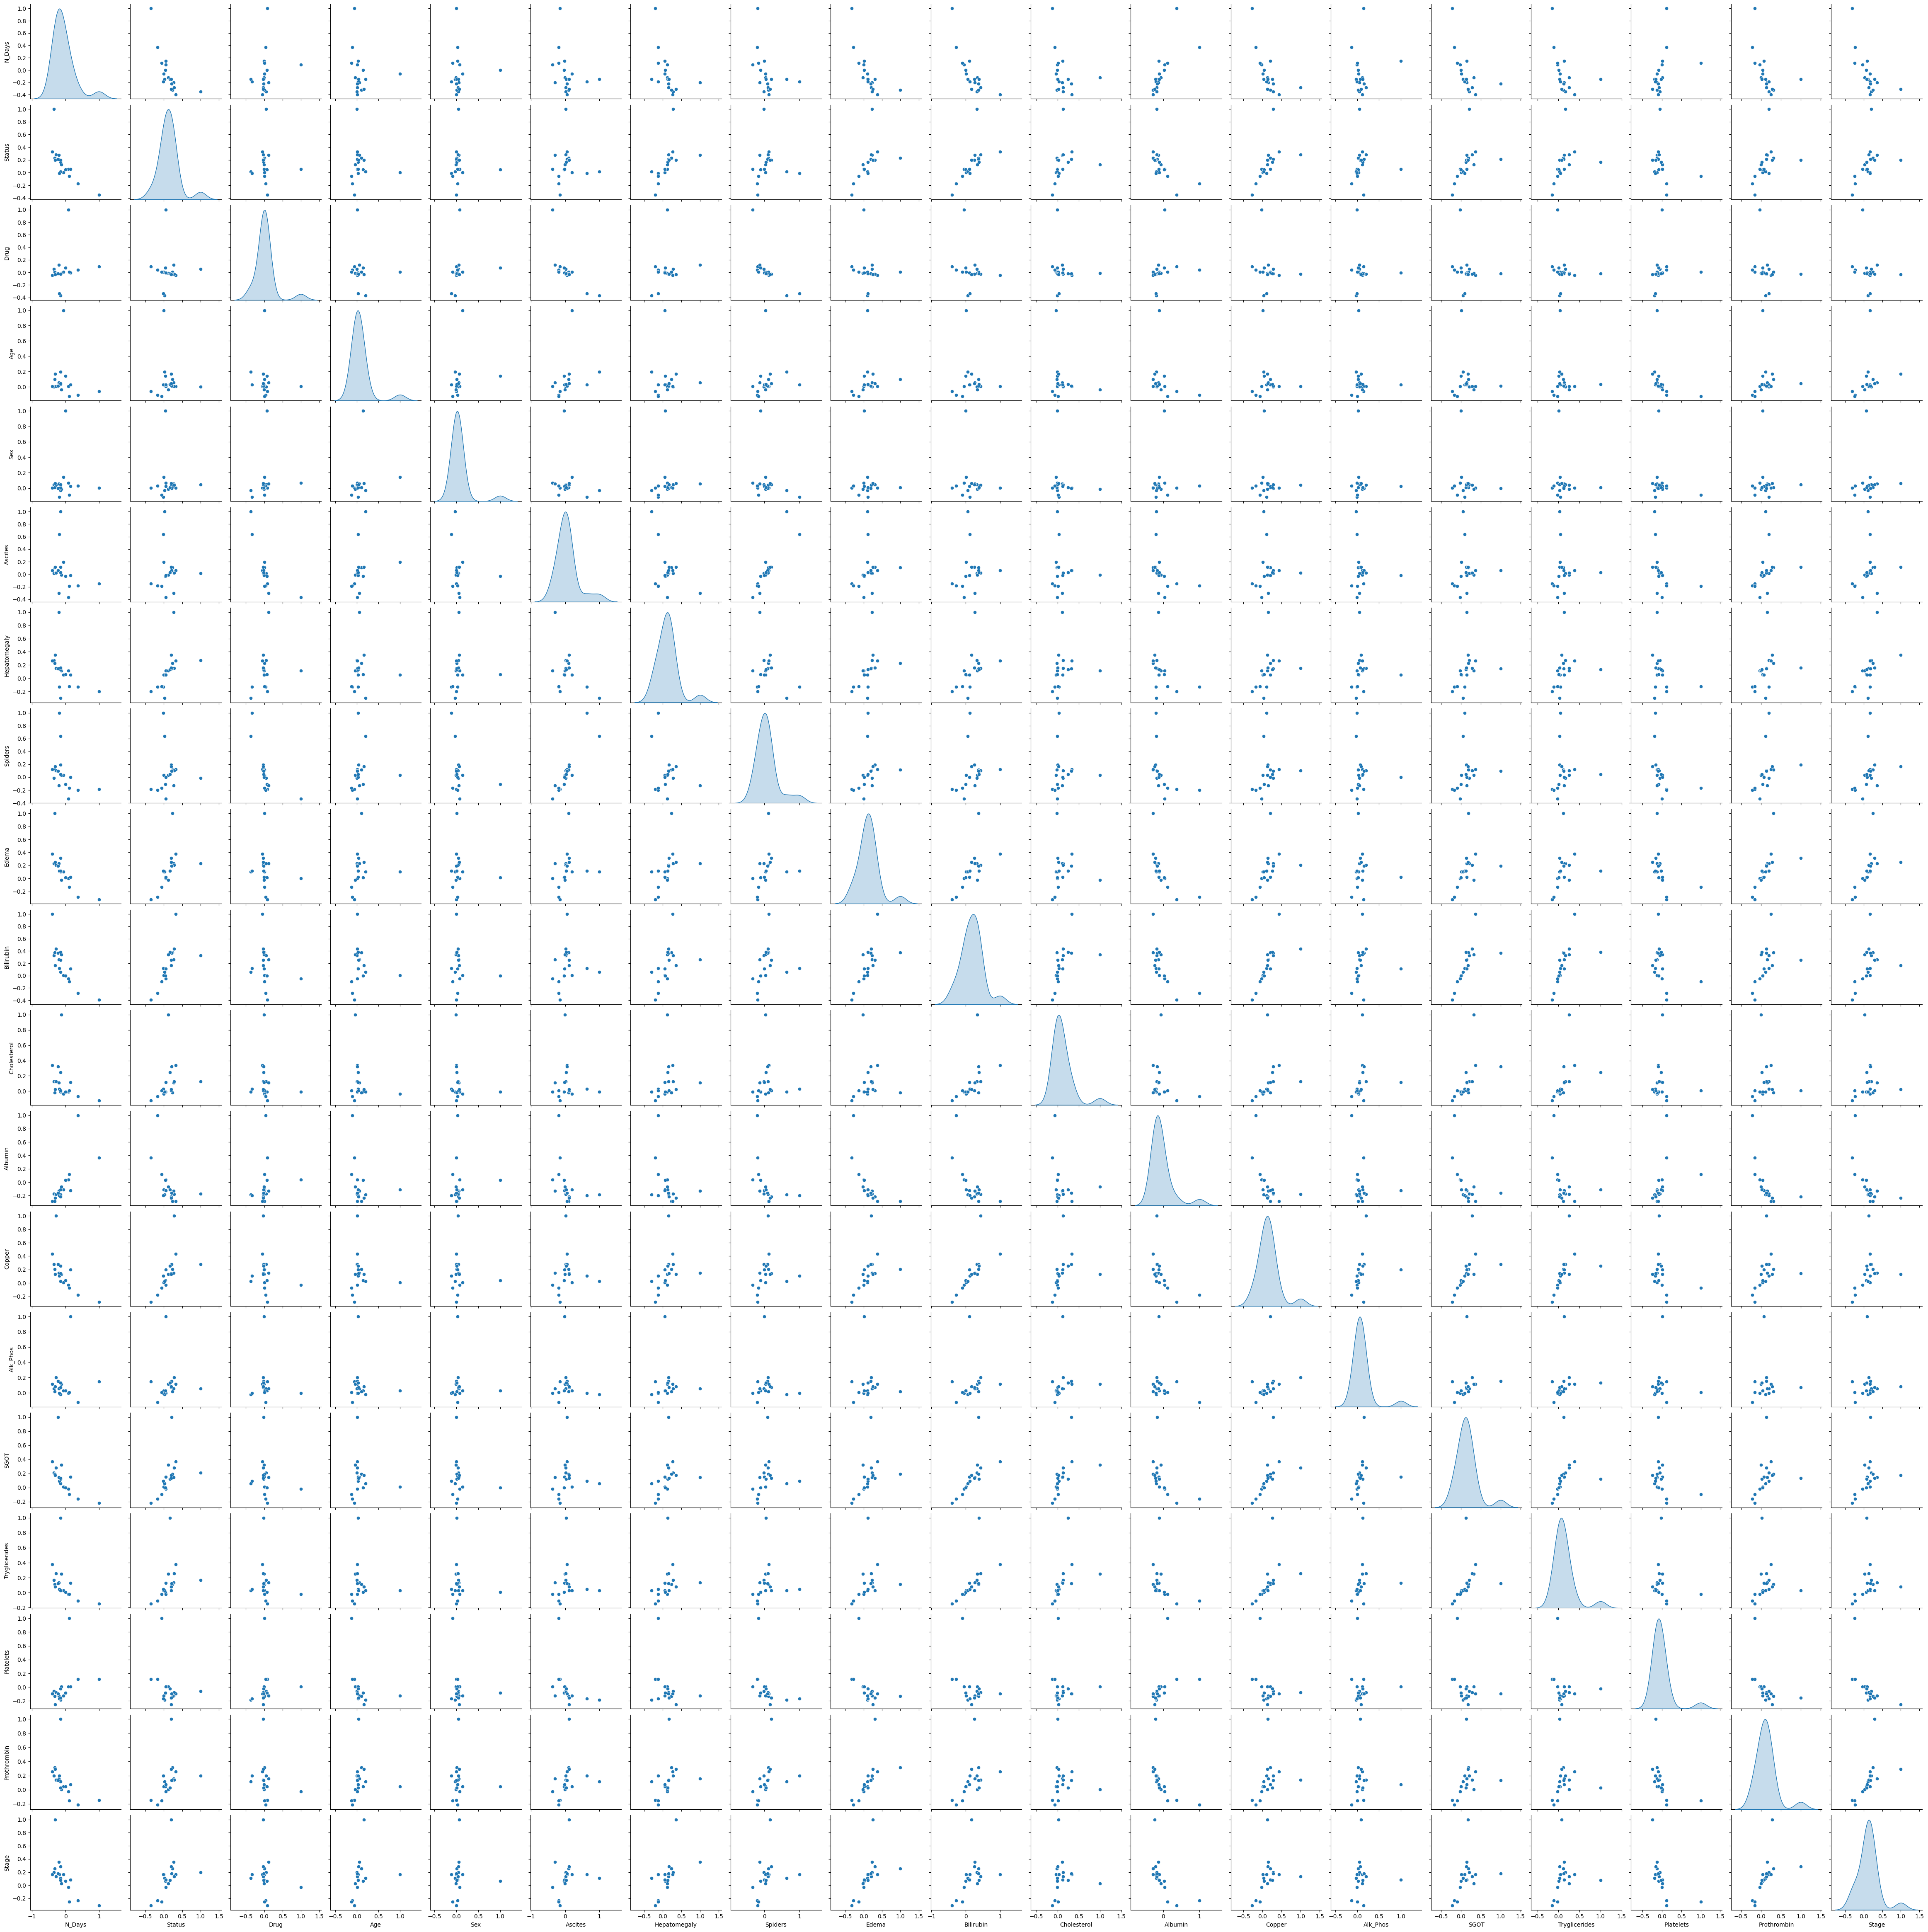

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
#heatmap fot correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
# title
plt.title('Correlation Matrix Heatmap')
plt.show()
sns.pairplot(correlation_matrix, diag_kind='kde')
plt.show()

In [17]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# ***Logistic regression***

In [18]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the LogisticRegression model
log_reg = LogisticRegression()

# Fit the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.715


# ***KNN***

In [19]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number of neighbors

# Fit the model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.925


# ***SVM***

In [20]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the SVM model
svm_model = SVC(kernel='poly', random_state=42)

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8784


# **Decision tree**

In [21]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the scaled training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = decision_tree.predict(X_test_scaled)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9804


# ***Random forest***

In [22]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the RandomForestClassifier model
random_forest = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.988


# ***Ada Boost***

In [23]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the AdaBoostClassifier model
ada_boost = AdaBoostClassifier(random_state=42)

# Fit the model on the scaled training data
ada_boost.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = ada_boost.predict(X_test_scaled)

# Evaluate the model using accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.823


# **XG Boost**

In [24]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBClassifier model
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9942


# ***Cat Boost***

In [25]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.2 MB/s eta 0:00:00


In [26]:
# Install CatBoost if not already installed
# !pip install catboost

# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the target variable
X = df.drop(columns=['Status'])
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the CatBoostClassifier model
catboost_classifier = CatBoostClassifier(random_seed=42, verbose=0)  # Set verbose=0 to suppress CatBoost output

# Fit the model on the training data
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.9926


# ***Regression model***

# ***District rainfall dataset***

In [27]:
import pandas as pd
df=pd.read_csv("/content/district wise rainfall normal.csv")
df.head()

STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  
1    483.5   1757.2    705.3  
2    405.6   1884.4    574.7  
3    841.3   1848.5    231.0  
4    645.4   3008.4    268.1

In [28]:
df.isnull().sum()

STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

In [29]:
df.describe()

JAN         FEB         MAR         APR         MAY  \
count  641.000000  641.000000  641.000000  641.000000  641.000000   
mean    18.355070   20.984399   30.034789   45.543214   81.535101   
std     21.082806   27.729596   45.451082   71.556279  111.960390   
min      0.000000    0.000000    0.000000    0.000000    0.900000   
25%      6.900000    7.000000    7.000000    5.000000   12.100000   
50%     13.300000   12.300000   12.700000   15.100000   33.900000   
75%     19.200000   24.100000   33.200000   48.300000   91.900000   
max    144.500000  229.600000  367.900000  554.400000  733.700000   

               JUN          JUL          AUG         SEP         OCT  \
count   641.000000   641.000000   641.000000  641.000000  641.000000   
mean    196.007332   326.033697   291.152262  194.609048   90.446334   
std     196.556284   221.364643   152.647325   99.830540   74.990685   
min       3.800000    11.600000    14.100000    8.600000    3.100000   
25%      68.800000   206.400000   194.600000  128.800000   34.300000   
50%     131.900000   293.700000   284.800000  181.300000   62.600000   
75%     226.600000   374.800000   358.100000  234.100000  130.200000   
max    1476.200000  1820.900000  1522.100000  826.300000  517.700000   

              NOV         DEC       ANNUAL     Jan-Feb      Mar-May  \
count  641.000000  641.000000   641.000000  641.000000   641.000000   
mean    34.117473   18.150858  1346.969579   39.339470   157.113105   
std     59.371274   32.711009   838.878874   47.212773   213.445888   
min      1.200000    0.000000    94.600000    0.000000     1.500000   
25%      6.600000    5.300000   830.400000   14.700000    27.800000   
50%     12.900000    7.900000  1116.200000   27.700000    67.200000   
75%     32.300000   14.900000  1530.900000   41.100000   172.400000   
max    475.100000  297.700000  7229.300000  335.300000  1256.500000   

          Jun-Sep      Oct-Dec  
count   641.00000   641.000000  
mean   1007.80234   142.714665  
std     629.33261   148.951752  
min      39.60000     5.600000  
25%     625.40000    51.600000  
50%     896.60000    86.700000  
75%    1193.80000   175.200000  
max    5228.00000  1048.500000

In [30]:
df.describe(include='object')

STATE_UT_NAME DISTRICT
count             641      641
unique             35      637
top     UTTAR PRADESH  BIJAPUR
freq               71        2

In [31]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

# ***Visualization***

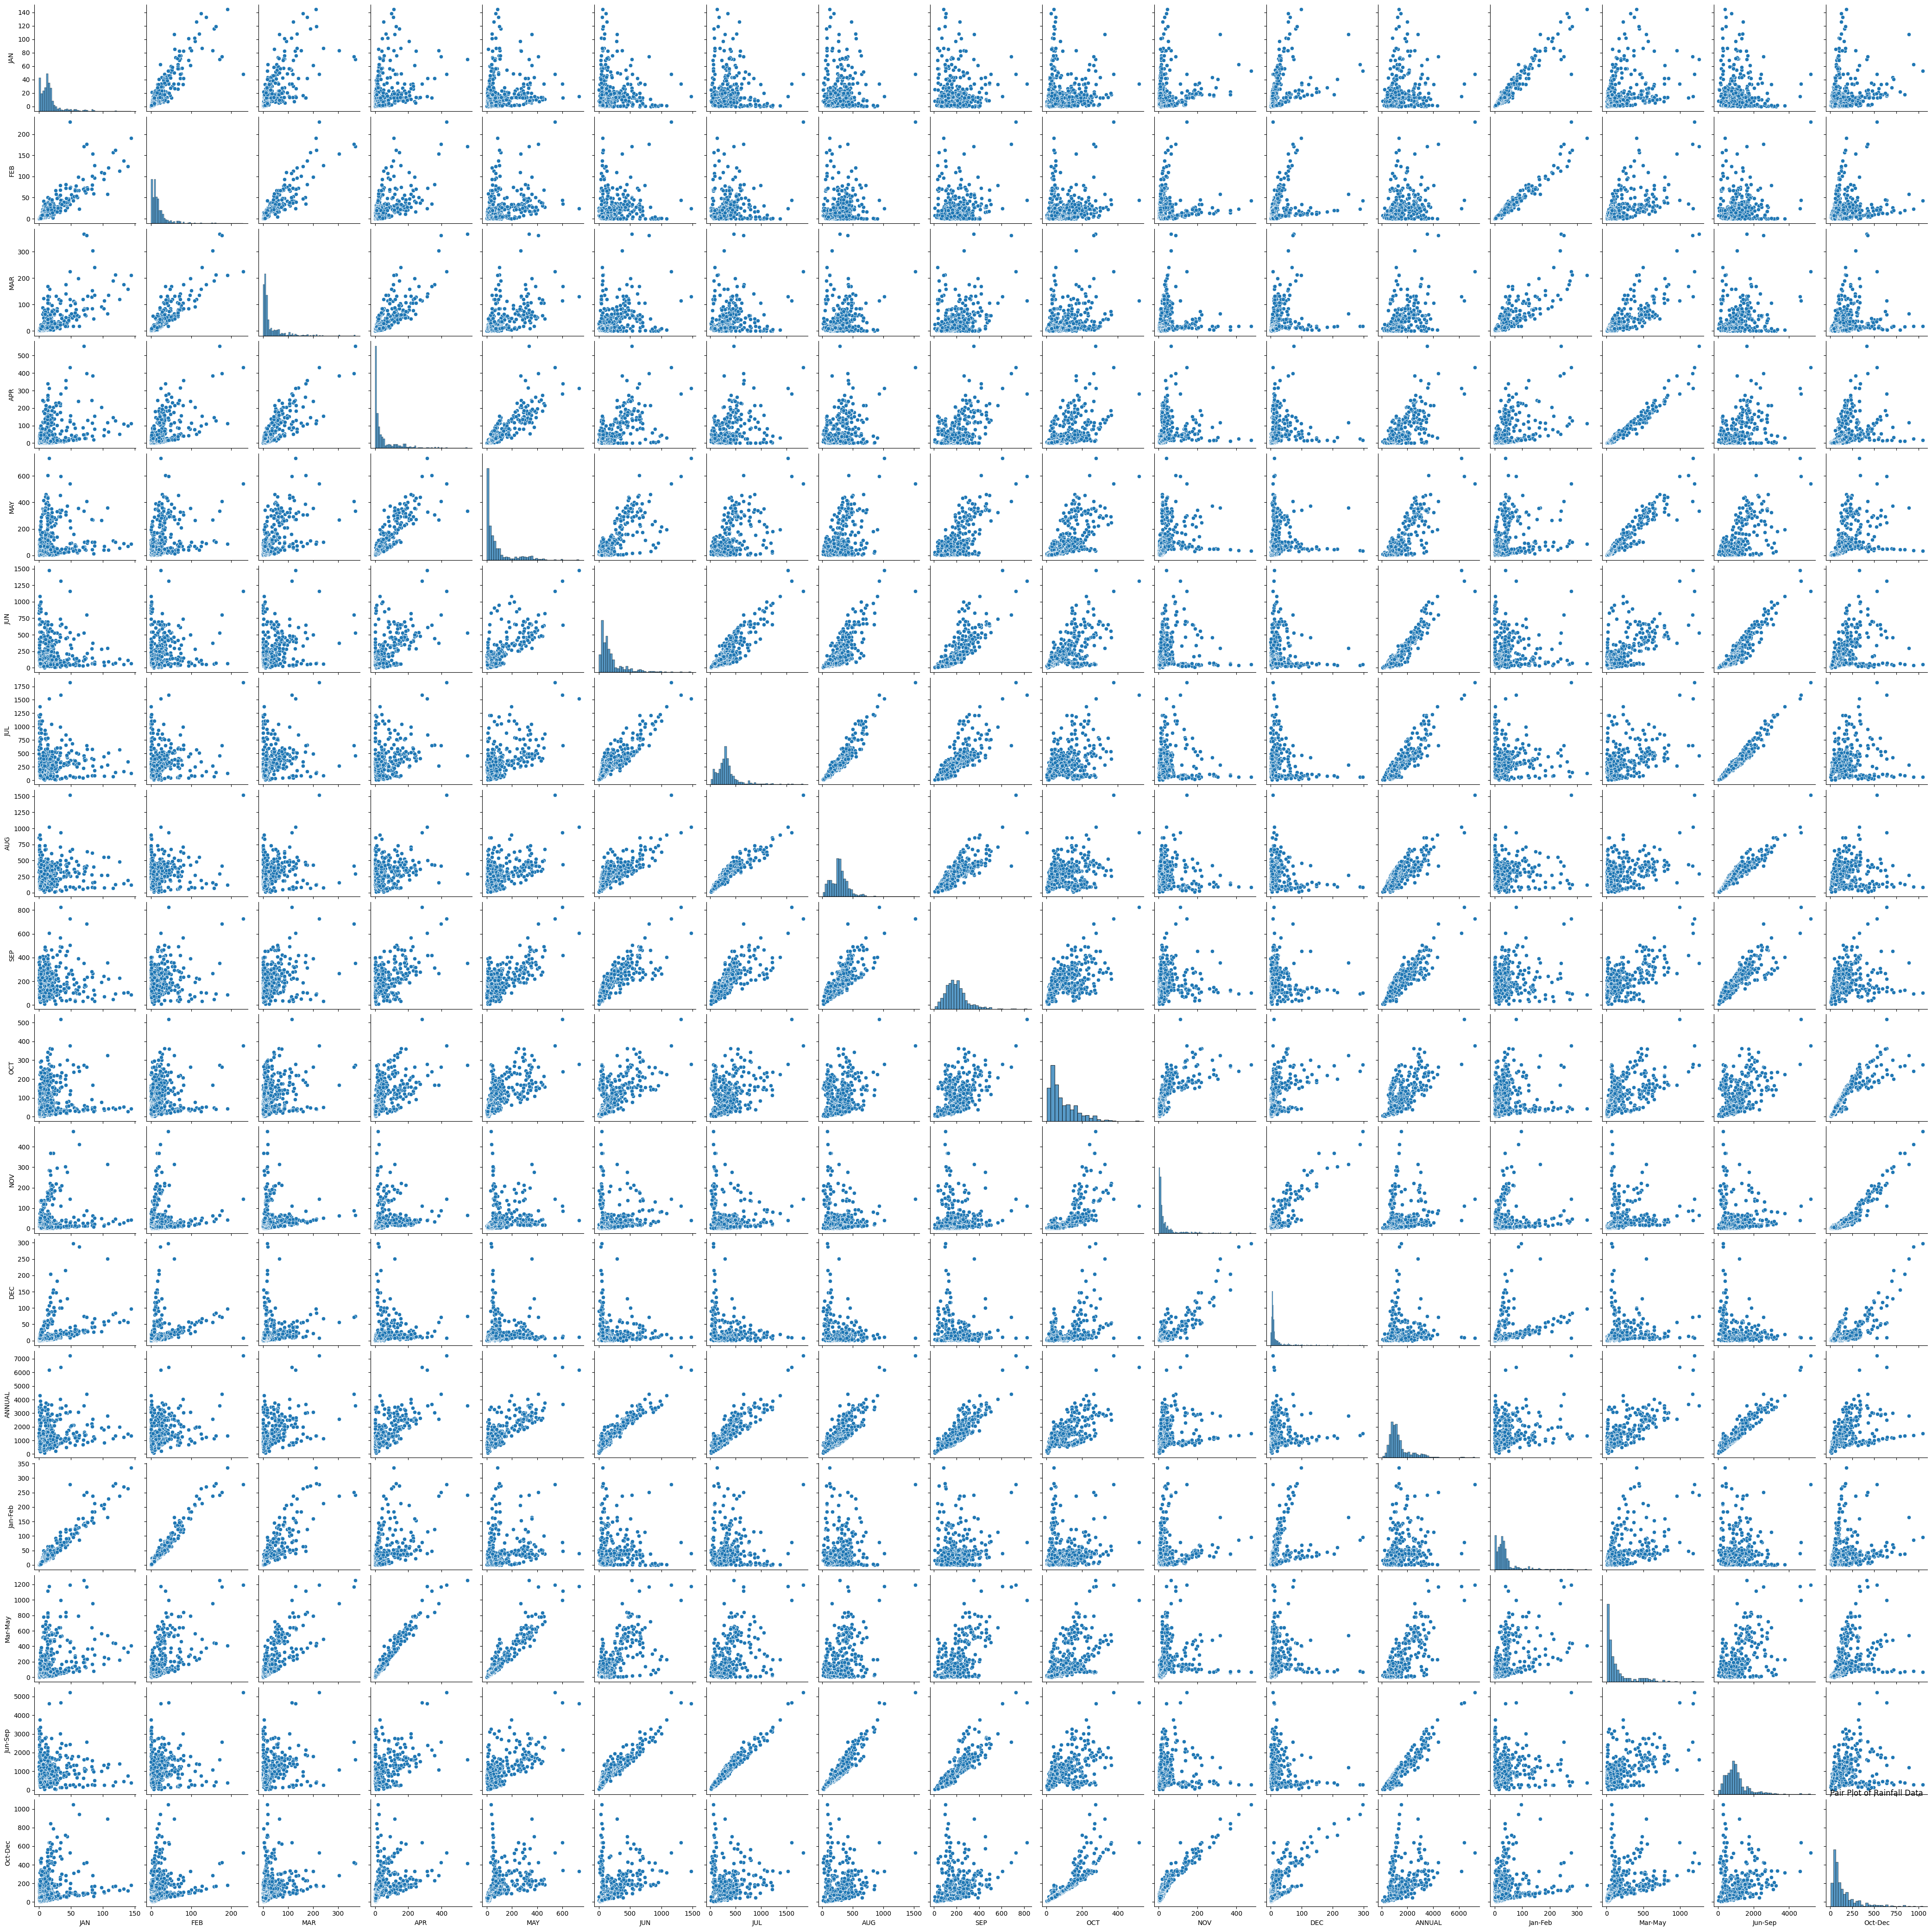

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
# Drop the 'STATE_UT_NAME' column
df = df.drop(columns=['STATE_UT_NAME'])

# Plot pair plot
sns.pairplot(df)
plt.title('Pair Plot of Rainfall Data')
plt.show()


In [33]:
import warnings
warnings.filterwarnings('ignore')

# ***Linear Regression***

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Check the column names
print("Column names in the DataFrame:", df.columns)

# Drop the appropriate columns
X = df.drop(columns=['DISTRICT', 'ANNUAL'])  # Features (independent variables)
y = df['ANNUAL']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate the model accuracy
accuracy = model.score(X_test, y_test)
print("Model Accuracy (R^2 score):", accuracy)


Column names in the DataFrame: Index(['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')
Mean Squared Error: 5.411089744725974e-25
Coefficients: [0.33333333 0.33333333 0.25       0.25       0.25       0.2
 0.2        0.2        0.2        0.25       0.25       0.25
 0.66666667 0.75       0.8        0.75      ]
Intercept: 0.0
Model Accuracy (R^2 score): 1.0


Regularized Regression ElasticNet

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Check the column names
print("Column names in the DataFrame:", df.columns)

# Drop the appropriate columns
X = df.drop(columns=['DISTRICT', 'ANNUAL'])  # Features (independent variables)
y = df['ANNUAL']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the ElasticNet model
elastic_model = ElasticNet()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # Mix ratio between lasso and ridge
    'max_iter': [1000, 5000, 10000]  # Number of iterations
}

# Perform GridSearchCV
grid_search = GridSearchCV(elastic_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print the best parameters
print("Best model parameters:", grid_search.best_params_)

# Print the coefficients and intercept of the model
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)


Column names in the DataFrame: Index(['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')
Mean Squared Error: 0.0041186994112400975
R^2 Score: 0.9999999953937603
Best model parameters: {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 10000}
Coefficients: [  37.71444667   48.3777477    77.20349353  120.45478424  185.91795138
  187.80976858  209.7750006   143.19596913   97.07781665   75.92042487
   60.18801029   33.3049635   -37.757444   -148.32592471    8.5942599
   -4.76614771]
Intercept: 1320.5505859375003


# **Regularized Regression Lasso**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Check the column names
print("Column names in the DataFrame:", df.columns)

# Drop the appropriate columns
X = df.drop(columns=['DISTRICT', 'ANNUAL'])  # Features (independent variables)
y = df['ANNUAL']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso model
lasso_model = Lasso()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'max_iter': [1000, 5000, 10000]  # Number of iterations
}

# Perform GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print the best parameters
print("Best model parameters:", grid_search.best_params_)

# Print the coefficients and intercept of the model
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)


Column names in the DataFrame: Index(['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')
Mean Squared Error: 0.005546505891279815
R^2 Score: 0.9999999937969409
Best model parameters: {'alpha': 0.01, 'max_iter': 5000}
Coefficients: [ 1.79260130e+02  2.29001801e+02  9.92006609e+01  1.54762435e+02
  2.38842814e+02  1.95073147e+02  2.18099548e+02  1.48770612e+02
  1.00868524e+02 -2.91608460e-02 -2.32592475e-01 -0.00000000e+00
 -3.50928252e+02 -2.50014386e+02 -1.47998133e+01  1.46754384e+02]
Intercept: 1320.5505859375003


# *Regularized Regression Ridge*

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Check the column names
print("Column names in the DataFrame:", df.columns)

# Drop the appropriate columns
X = df.drop(columns=['DISTRICT', 'ANNUAL'])  # Features (independent variables)
y = df['ANNUAL']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge model
ridge_model = Ridge()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],  # Solvers available for Ridge regression
    'max_iter': [None, 1000, 5000, 10000]  # Number of iterations
}

# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print the best parameters
print("Best model parameters:", grid_search.best_params_)

# Print the coefficients and intercept of the model
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)


Column names in the DataFrame: Index(['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec'],
      dtype='object')
Mean Squared Error: 2.5938149237798163e-05
R^2 Score: 0.9999999999709915
Best model parameters: {'alpha': 0.01, 'max_iter': None, 'solver': 'svd'}
Coefficients: [ 13.49752995  17.22862932  31.54884935  49.21824646  75.93241567
 145.84286418 162.96969962 111.18861626  75.39683711  50.36994257
  40.04016394  22.0445498   16.03687299  62.94967294 142.00774667
  46.07088806]
Intercept: 1320.5505859375003
